In [1]:
#source
# https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

In [2]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm
import scipy.stats as stats


from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv("tmdb_5000movies_1.csv")
df.head()

,budget,genre,homepage,id,keywords,original_language,original_title,overview,popularity,production_company,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,United States of America,12/10/2009,2787965087,162.0,English,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,United States of America,5/19/2007,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâ€™s past sends him...,107.376788,Columbia Pictures,United Kingdom,10/26/2015,880674609,148.0,French,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,Action,http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures,United States of America,7/16/2012,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,Action,http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,3/7/2012,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df.drop(columns = ['homepage', 'tagline', 'overview', 'id', 'keywords'], inplace = True)


In [6]:
df.head(10)



,budget,genre,original_language,original_title,popularity,production_company,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Action,en,Avatar,150.437577,Ingenious Film Partners,United States of America,12/10/2009,2787965087,162.0,English,Released,Avatar,7.2,11800
1,300000000,Adventure,en,Pirates of the Caribbean: At World's End,139.082615,Walt Disney Pictures,United States of America,5/19/2007,961000000,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,en,Spectre,107.376788,Columbia Pictures,United Kingdom,10/26/2015,880674609,148.0,French,Released,Spectre,6.3,4466
3,250000000,Action,en,The Dark Knight Rises,112.312950,Legendary Pictures,United States of America,7/16/2012,1084939099,165.0,English,Released,The Dark Knight Rises,7.6,9106
4,260000000,Action,en,John Carter,43.926995,Walt Disney Pictures,United States of America,3/7/2012,284139100,132.0,English,Released,John Carter,6.1,2124
5,258000000,Fantasy,en,Spider-Man 3,115.699814,Columbia Pictures,United States of America,5/1/2007,890871626,139.0,English,Released,Spider-Man 3,5.9,3576
6,260000000,Animation,en,Tangled,48.681969,Walt Disney Pictures,United States of America,11/24/2010,591794936,100.0,English,Released,Tangled,7.4,3330
7,280000000,Action,en,Avengers: Age of Ultron,134.279229,Marvel Studios,United States of America,4/22/2015,1405403694,141.0,English,Released,Avengers: Age of Ultron,7.3,6767
8,250000000,Adventure,en,Harry Potter and the Half-Blood Prince,98.885637,Warner Bros.,United Kingdom,7/7/2009,933959197,153.0,English,Released,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,Action,en,Batman v Superman: Dawn of Justice,155.790452,DC Comics,United States of America,3/23/2016,873260194,151.0,English,Released,Batman v Superman: Dawn of Justice,5.7,7004


In [7]:
df.shape

(4803, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genre                 4775 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_company    4452 non-null   object 
 6   production_countries  4629 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  spoken_languages      4705 non-null   object 
 11  status                4803 non-null   object 
 12  title                 4803 non-null   object 
 13  vote_average          4803 non-null   float64
 14  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(

In [9]:
df.isnull().sum()

budget                    0
genre                    28
original_language         0
original_title            0
popularity                0
production_company      351
production_countries    174
release_date              1
revenue                   0
runtime                   2
spoken_languages         98
status                    0
title                     0
vote_average              0
vote_count                0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.400000e+03,4400.000000,4.400000e+03,4400.000000,4400.000000,4400.000000
mean,3.148871e+07,23.259140,8.949009e+07,108.257045,6.182205,749.696136
std,4.158930e+07,32.636319,1.681553e+08,20.854034,1.021042,1270.647573
min,0.000000e+00,0.001586,0.000000e+00,0.000000,0.000000,0.000000
25%,2.696500e+06,6.323895,1.575000e+01,95.000000,5.700000,80.000000
50%,1.700000e+07,14.769495,2.594764e+07,105.000000,6.300000,286.000000
75%,4.200000e+07,30.118662,1.017162e+08,118.000000,6.800000,827.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [12]:
df2 = df.copy()
print(df2.shape)

(4400, 15)


In [13]:
df2["zscore_budget"] = np.abs(stats.zscore(df2["budget"]))

In [14]:
z_outliers = df2.loc[df2["zscore_budget"] > 3].index

print(z_outliers)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  27,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,
             41,  42,  43,  44,  45,  46,  47,  48,  51,  52,  53,  54,  55,
             56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,  69,  70,
             72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  84,  85,
             86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  98, 101,
            102, 104, 105, 106, 107, 126, 145, 208, 259],
           dtype='int64')


In [15]:
df2 = df2.drop(z_outliers)
print(df2.shape)

(4300, 16)


In [16]:
df2 = df2.reset_index(drop = True)

In [17]:
df2["zscore_popularity"] = np.abs(stats.zscore(df2["popularity"]))

In [18]:
z_outliers = df2.loc[df2["zscore_popularity"] > 3].index

print(z_outliers)

Int64Index([   0,    5,   12,   23,   28,   30,   37,   84,   97,   99,  101,
             102,  131,  138,  139,  161,  169,  174,  220,  227,  228,  233,
             260,  321,  354,  403,  443,  508,  510,  558,  589,  604,  684,
             705,  903, 1047, 1229, 1356, 1767, 2167, 2388, 2759, 3065, 3157,
            3496, 3628],
           dtype='int64')


In [19]:
df2 = df2.drop(z_outliers)
print(df2.shape)

(4254, 17)


In [20]:
df2 = df2.reset_index(drop = True)

In [21]:
df2["zscore_revenue"] = np.abs(stats.zscore(df2["revenue"]))

In [22]:
z_outliers = df2.loc[df2["zscore_revenue"] > 3].index

print(z_outliers)

Int64Index([   0,   11,   12,   14,   15,   16,   17,   18,   19,   20,   24,
              26,   33,   41,   42,   44,   45,   47,   48,   51,   54,   55,
              67,   71,   75,   76,   77,   79,   81,   85,   91,   92,   94,
             101,  102,  105,  117,  118,  120,  121,  128,  129,  133,  139,
             155,  157,  159,  195,  204,  205,  207,  215,  218,  219,  224,
             232,  249,  258,  259,  263,  299,  300,  337,  366,  376,  378,
             380,  385,  428,  435,  436,  448,  495,  501,  504,  541,  554,
             608,  653,  747,  759,  760,  764,  867, 1004, 1012, 1211, 1343,
            1544, 1658, 1659, 1832, 1859, 2337, 2487, 2621, 2622, 2772],
           dtype='int64')


In [23]:
df2 = df2.drop(z_outliers)
print(df2.shape)

(4156, 18)


In [24]:
df2 = df2.reset_index(drop = True)

In [25]:
df2["zscore_runtime"] = np.abs(stats.zscore(df2["runtime"]))

In [26]:
z_outliers = df2.loc[df2["zscore_runtime"] > 3].index

print(z_outliers)

Int64Index([  10,   92,  131,  134,  222,  294,  358,  466,  479,  500,  638,
             662,  663,  670,  673,  866,  884,  900,  952, 1103, 1154, 1223,
            1226, 1243, 1425, 1518, 1546, 1575, 1607, 1677, 1773, 1939, 2013,
            2019, 2040, 2112, 2122, 2141, 2267, 2281, 2450, 2545, 2622, 2644,
            2670, 2692, 2855, 2859, 2887, 2922, 2928, 2973, 3032, 3050, 3069,
            3139, 3271, 3274, 3312, 3357, 3384, 3437, 3441, 3532, 3560, 3651,
            3770, 3959, 3970, 3979, 3999, 4032, 4075, 4105],
           dtype='int64')


In [27]:
df2 = df2.drop(z_outliers)
print(df2.shape)

(4082, 19)


In [28]:
df2 = df2.reset_index(drop = True)

In [29]:
df2["zscore_vote_average"] = np.abs(stats.zscore(df2["vote_average"]))

In [30]:
z_outliers = df2.loc[df2["zscore_vote_average"] > 3].index

print(z_outliers)

Int64Index([ 285,  860, 1208, 1390, 1414, 1909, 1934, 1950, 2087, 2132, 2135,
            2291, 2544, 2770, 3008, 3248, 3268, 3410, 3412, 3415, 3476, 3504,
            3508, 3510, 3513, 3570, 3573, 3578, 3588, 3743, 3746, 3749, 3750,
            3752, 3876, 3882, 3905, 3911, 3941, 3983, 3985, 3989, 4005, 4017,
            4022, 4031, 4074, 4076],
           dtype='int64')


In [31]:
df2 = df2.drop(z_outliers)
print(df2.shape)

(4034, 20)


In [32]:
df2 = df2.reset_index(drop = True)

In [33]:
df2["zscore_vote_count"] = np.abs(stats.zscore(df2["vote_count"]))

In [34]:
z_outliers = df2.loc[df2["zscore_vote_count"] > 3].index

print(z_outliers)

Int64Index([   0,    6,    7,   11,   12,   32,   38,   41,   45,   60,   61,
              73,   79,   80,   90,  103,  118,  158,  166,  168,  185,  211,
             233,  234,  246,  295,  308,  315,  362,  370,  417,  465,  468,
             472,  475,  493,  593,  600,  602,  651,  673,  694,  699,  810,
             859,  875,  906,  913,  946, 1010, 1087, 1111, 1143, 1268, 1277,
            1289, 1290, 1295, 1303, 1432, 1450, 1455, 1538, 1540, 1553, 1571,
            1704, 1712, 1783, 1797, 1803, 1808, 1817, 1820, 1864, 1889, 1983,
            1984, 2031, 2094, 2152, 2199, 2228, 2238, 2285, 2397, 2418, 2441,
            2500, 2560, 2616, 2703, 2795, 2862, 3038, 3052, 3155, 3267, 3738],
           dtype='int64')


In [35]:
df2 = df2.drop(z_outliers)
print(df2.shape)

(3935, 21)


In [36]:
df2 = df2.reset_index(drop = True)

In [37]:
df2.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,zscore_budget,zscore_popularity,zscore_revenue,zscore_runtime,zscore_vote_average,zscore_vote_count
count,3.935000e+03,3935.000000,3.935000e+03,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000
mean,2.496181e+07,18.005090,5.550512e+07,106.000508,6.154816,466.428463,0.589000,0.472759,0.548266,0.653318,0.677034,0.570062
std,2.928319e+07,15.817185,7.907329e+07,16.478098,0.856748,559.355592,0.416541,0.324759,0.403152,0.484000,0.516804,0.440260
min,0.000000e+00,0.001586,0.000000e+00,47.000000,3.200000,1.000000,0.000272,0.000034,0.001163,0.017750,0.032383,0.000102
25%,2.000000e+06,6.026212,0.000000e+00,94.000000,5.600000,75.000000,0.324368,0.242261,0.332387,0.277325,0.265786,0.315674
50%,1.500000e+07,13.543053,2.034216e+07,103.000000,6.200000,247.000000,0.588889,0.457861,0.553759,0.572399,0.563956,0.537431
75%,3.675000e+07,25.812734,7.924948e+07,116.000000,6.800000,636.000000,0.757221,0.639472,0.601741,0.902973,0.961516,0.663487
max,1.550000e+08,101.599427,4.156862e+08,167.000000,8.500000,2904.000000,2.970123,2.824658,2.906844,2.968494,2.914691,2.995953


In [38]:
np.percentile(df2['popularity'], 85)

34.4187056

In [39]:
df2["Hit_Movie"] = np.where((df2["popularity"] >= 32.4187056), "Y", "N")
df2.head()

,budget,genre,original_language,original_title,popularity,production_company,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,zscore_budget,zscore_popularity,zscore_revenue,zscore_runtime,zscore_vote_average,zscore_vote_count,Hit_Movie
0,150000000,Adventure,en,Prince of Persia: The Sands of Time,62.169881,Walt Disney Pictures,United States of America,5/19/2010,335154643,116.0,English,Released,Prince of Persia: The Sands of Time,6.2,2317,2.849886,1.431441,2.227120,0.424862,0.067007,2.248531,Y
1,140000000,Action,en,Rush Hour 3,22.571780,New Line Cinema,United States of America,8/8/2007,258022233,91.0,Latin,Released,Rush Hour 3,6.1,783,2.609412,0.032269,1.576087,0.804615,0.032383,0.295302,N
2,145000000,Adventure,en,The Mummy: Tomb of the Dragon Emperor,60.034162,Universal Pictures,Germany,7/1/2008,401128639,112.0,English,Released,The Mummy: Tomb of the Dragon Emperor,5.2,1387,2.729649,1.355977,2.783971,0.228145,0.926893,1.064370,Y
3,27000000,Action,en,The Lovers,2.418535,Corsan,Australia,2/13/2015,0,109.0,English,Released,The Lovers,4.8,34,0.107942,0.679832,0.601741,0.080608,1.324452,0.658394,N
4,15000000,Action,ja,ã‚·ãƒ³ãƒ»ã‚´ã‚¸ãƒ©,9.476999,Cine Bazar,Japan,7/29/2016,77000000,120.0,Italiano,Released,Shin Godzilla,6.5,143,0.396510,0.430426,0.048175,0.621578,0.365176,0.519605,N


In [40]:
df2["Hit_Movie"].value_counts()

N    3274
Y     661
Name: Hit_Movie, dtype: int64

In [41]:
pd.crosstab(df2["Hit_Movie"],df2["original_language"], margins=False, normalize=False)

#97 percent of hit movies are in English!



original_language,af,ar,cn,da,de,el,en,es,fa,fr,he,hi,id,is,it,ja,ko,nb,nl,no,pl,ps,pt,ro,ru,sl,sv,ta,th,tr,xx,zh
Hit_Movie,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
N,1,2,12,5,21,1,3044,28,4,58,3,10,1,1,7,10,9,1,3,1,1,1,6,1,10,1,5,1,2,1,1,22
Y,0,0,0,2,2,0,644,0,0,1,0,0,1,0,3,4,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [42]:
pd.crosstab(df2["Hit_Movie"],df2["production_countries"], margins=False, normalize=False)

#More than half (69% actually) of those classified as a hit movie are produced in the United States





production_countries,Afghanistan,Argentina,Aruba,Australia,Austria,Bahamas,Belgium,Bolivia,Bosnia and Herzegovina,Brazil,Bulgaria,Cameroon,Canada,China,Cyprus,Czech Republic,Denmark,Ecuador,Fiji,Finland,France,Germany,Greece,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Ireland,Israel,Italy,Jamaica,Japan,Lebanon,Luxembourg,Malaysia,Malta,Mexico,Morocco,Netherlands,New Zealand,Norway,Panama,Peru,Philippines,Poland,Romania,Russia,Singapore,Slovenia,South Africa,South Korea,Spain,Sweden,Switzerland,Thailand,Turkey,United Arab Emirates,United Kingdom,United States of America
Hit_Movie,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
N,1,7,1,67,3,2,17,1,1,11,1,1,164,27,1,11,12,1,1,1,127,151,3,21,2,0,20,0,3,20,2,17,0,23,1,2,2,0,19,1,9,12,5,1,1,0,1,3,9,1,1,8,11,24,4,9,2,1,5,258,2164
Y,0,0,0,14,1,0,0,0,0,1,1,0,30,5,0,3,2,0,0,1,27,28,0,0,0,2,6,1,0,1,0,4,1,7,0,0,0,1,1,0,0,2,1,0,0,1,0,0,1,0,0,1,2,8,0,1,0,0,2,54,451


In [43]:
df2["budget"].groupby(df2["Hit_Movie"]).mean()

#Looks like you were more apt to have a hit movie it you spent more than the average on budget.


Hit_Movie
N    2.041406e+07
Y    4.748726e+07
Name: budget, dtype: float64

In [44]:
df2["runtime"].groupby(df2["Hit_Movie"]).mean()

#Longer movies were more apt to be more of a hit.

Hit_Movie
N    105.073916
Y    110.590015
Name: runtime, dtype: float64

In [45]:
df2["profit"] = df2["revenue"] - df2["budget"]
df2.head(10)

,budget,genre,original_language,original_title,popularity,production_company,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,zscore_budget,zscore_popularity,zscore_revenue,zscore_runtime,zscore_vote_average,zscore_vote_count,Hit_Movie,profit
0,150000000,Adventure,en,Prince of Persia: The Sands of Time,62.169881,Walt Disney Pictures,United States of America,5/19/2010,335154643,116.0,English,Released,Prince of Persia: The Sands of Time,6.2,2317,2.849886,1.431441,2.227120,0.424862,0.067007,2.248531,Y,185154643
1,140000000,Action,en,Rush Hour 3,22.571780,New Line Cinema,United States of America,8/8/2007,258022233,91.0,Latin,Released,Rush Hour 3,6.1,783,2.609412,0.032269,1.576087,0.804615,0.032383,0.295302,N,118022233
2,145000000,Adventure,en,The Mummy: Tomb of the Dragon Emperor,60.034162,Universal Pictures,Germany,7/1/2008,401128639,112.0,English,Released,The Mummy: Tomb of the Dragon Emperor,5.2,1387,2.729649,1.355977,2.783971,0.228145,0.926893,1.064370,Y,256128639
3,27000000,Action,en,The Lovers,2.418535,Corsan,Australia,2/13/2015,0,109.0,English,Released,The Lovers,4.8,34,0.107942,0.679832,0.601741,0.080608,1.324452,0.658394,N,-27000000
4,15000000,Action,ja,ã‚·ãƒ³ãƒ»ã‚´ã‚¸ãƒ©,9.476999,Cine Bazar,Japan,7/29/2016,77000000,120.0,Italiano,Released,Shin Godzilla,6.5,143,0.396510,0.430426,0.048175,0.621578,0.365176,0.519605,N,62000000
5,150000000,Fantasy,en,The Sorcerer's Apprentice,35.580815,Walt Disney Pictures,United States of America,7/13/2010,215283742,109.0,English,Released,The Sorcerer's Apprentice,5.8,1470,2.849886,0.491934,1.215354,0.080608,0.330553,1.170053,Y,65283742
6,155000000,Adventure,en,The Chronicles of Narnia: The Voyage of the Da...,49.661984,Dune Entertainment,United States of America,8/13/2010,415686217,113.0,English,Released,The Chronicles of Narnia: The Voyage of the Da...,6.2,1514,2.970123,0.989483,2.906844,0.277325,0.067007,1.226078,Y,260686217
7,150000000,Adventure,en,Night at the Museum: Battle of the Smithsonian,81.781591,Twentieth Century Fox Film Corporation,United States of America,5/20/2009,413106170,105.0,English,Released,Night at the Museum: Battle of the Smithsonian,5.9,1971,2.849886,2.124408,2.885067,0.116108,0.231163,1.807972,Y,263106170
8,150000000,Thriller,en,Angels & Demons,67.447636,Columbia Pictures,Italy,5/13/2009,356613439,138.0,English,Released,Angels & Demons,6.5,2129,2.849886,1.617927,2.408242,1.506801,0.365176,2.009152,Y,206613439
9,150000000,Animation,en,Bolt,41.845878,Walt Disney Animation Studios,United States of America,11/21/2008,309979994,98.0,English,Released,Bolt,6.3,1750,2.849886,0.713306,2.014634,0.460362,0.166397,1.526575,Y,159979994


In [46]:
df2["profit"].groupby(df2["Hit_Movie"]).mean()

#popular movies made money

Hit_Movie
N    1.700908e+07
Y    9.757977e+07
Name: profit, dtype: float64

In [47]:
pd.crosstab(df2["Hit_Movie"],df2["production_company"], margins=False, normalize=False)

production_company,100 Bares,1492 Pictures,1818,21 Laps Entertainment,26 Films,2929 Productions,3 Arts Entertainment,30 Something Productions,34th Street Films,360 Pictures,3L Filmproduktion GmbH,3Mark Entertainment,40 Acres & A Mule Filmworks,A B Corp,A Band Apart,A Bigger Boat,A Loopy Production LLC,A Space Between,ABC Pictures,ANA Media,ARTE,AST Studios,AV Pictures,AVCO Embassy Pictures,Aardman Animations,Acajou Films,Access Motion Picture Group,Act III Communications,Ad Hominem Enterprises,AdScott Pictures,Ada Films,Adela Pictures,Adlabs Films Ltd.,After Dark Films,Against the Wild Films,Agi Orsi Productions,Alcon Entertainment,Aldamisa Entertainment,Alex Entertainment Inc.,Alexandre Films,Alfama Films,All Girl Productions,Allagash Films,Alliance Atlantis Communications,Alliance Films,Allied Artists Pictures,Altavista Films,Amblin Entertainment,Amen Ra Films,American Film Institute (AFI),American Filmworks,American Zoetrope,An Olive Branch Productions,Anarchist's Convention Films,Anchor Bay Films,Animus Films,Anonymous Content,Antares Produzione Cinematografica,Antena 3 Films,Anthem Pictures,Antzworks,Apatow Productions,Apipoula\u00ef,Apostle Productions,Appian Way,Applause Pictures,Arachnid Productions Ltd.,Aramid Entertainment Fund,Arcade Pictures,Arcadia Motion Pictures,Archer Street Productions,ArieScope Pictures,Armory Films,Arrowstorm Entertainment,Ars\u00e9nico Producciones,Art Linson Productions,Art Pictures Studio,Arte,Artfire Films,Artisan Entertainment,Artists Public Domain,Arts Council of England,Ascendant Pictures,Ascot Elite Home Entertainment,Asghar Farhadi Productions,Associated General Films,Asylum Films,Asymmetrical Productions,Atlantic Entertainment Group,Atlas 3 Productions,Atlas Entertainment,August Heart Entertainment,Australian Film Finance Corporation,Australian Film Finance Corporation (AFFC),Automatik Entertainment,Autonomous,Avenue Pictures Productions,Avon Production,BBC,BBC Films,BBC Worldwide,BIM Distribuzione,B\u00e9same Mucho Pictures,B\u00f3rd Scann\u00e1n na h\u00c9ireann,Bac Films,Back Lot Pictures,Bad Robot,Baleuko S.L.,Bandai Visual Company,Battleplan Productions,Bazelevs Production,Bazmark Films,Be Your Own Hollywood,Beacon Communications,Bearing Fruit Entertainment,Becker International,Bedford Falls Productions,Before the Door Pictures,Beijing New Picture Film Co. Ltd.,Bel Air Entertainment,Believe Entertainment,Belladonna Productions,Belstar Productions,Benaroya Pictures,Bentley Filmgroup,Beverly Detroit,Big Easy Pictures,Big Idea Productions,Big Indie Pictures,Bill Plympton Studios,Birdsong Pictures,Blackfriars Bridge Films,Bleiberg Entertainment,BlinkWorks Media,Block 2 Pictures,Blue Askew,Blue Dot Productions,Blue Sky Studios,Blueprint Pictures,Blumhouse Productions,Bold Films,Boll KG,Boll Kino Beteiligungs GmbH & Co. KG,Bollywood Hollywood Production,Bona International Film Group,Bookshop Productions,Boram Entertainment Inc.,Brad Grey Pictures,Brave New Films,Brian Barrett Pictures,Bright Cold Day Films,Brightlight Pictures,Brillstein-Grey Entertainment,Bristol Bay Productions,British Broadcasting Corporation (BBC),British Film Institute (BFI),British Screen,Broken Lizard Industries,Brooksfilms,Brooksfilms Ltd.,Brookstreet Pictures,Brownstone Productions,Buena Vista,Bungalow Productions,Burn Later Productions,Butcher's Run Productions,Byronic Pose Productions,Bystorm Films,C&P Productions,CBS Films,CJ Capital Investment,CJ Entertainment,CN Film,Calder Road Film,Caliber Media Company,Cambridge Productions,Canadian Broadcasting Corporation (CBC),Canadian Film Development Corporation (CFDC),Canal Plus,Canal+,Cannon Films,Cannon Group,Cannon Pictures,Capitol Films,Cappa Productions,Capstone Entertainment Group,Caravan Pictures,Carmel Entertainment,Carnaby International,Carousel Picture Company,"Carousel Picture Company, The",Caruso / Mendelsohn Productions,Casey Silver Productions,Castle Rock Entertainment,Caviar Films,Celador Films,Celluloid Dreams,Central Cinema Company Film,Centra

In [48]:
#Studio Name--No. of Films--Rank in 2022 US Market Share
#Universal Pictures/DreamWorks SKG--76--#1
#Columbia Pictures/Columbia Pictures Corporation (Sony)--62--#5
#Paramount Pictures/Miramax Films--55--#3
#Twentieth Century Fox Film Corporation--36--#6
#New Line Cinema/Warner Bros--40--#4
#Summit Entertainment (Lionsgate)--15--#10
#United Artists--15--#9
#Village Roadshow Pictures--10--NR
#Walt Disney Pictures--19--#2

#328 (49%) of the 661 movies were produced by studios ranking in the top 10 in US Market share in 2022

#https://www.the-numbers.com/market/2022/distributors

In [49]:
pd.crosstab(df2["Hit_Movie"],df2["genre"], margins=False, normalize=False)

#Action--140
#Comedy--112
#Drama--107
#Adventure--71
#Horror--54
#Thriller--32
#Animation--25
#Fantasy--22
#Sci-Fi--22
#Romance--16

#35% Action/Adventure
#These genres accounted for 91% of all Hit Movies! Not appearing...War, History, Family, Crime
#0 Foreign Films or Documentaries

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Hit_Movie,,,,,,,,,,,,,,,,,,,,
N,478,173,62,805,149,46,883,37,63,1,18,213,29,30,77,47,2,131,14,16
Y,140,71,25,112,27,0,107,5,32,0,2,54,2,6,16,22,0,32,3,5


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3935 non-null   int64  
 1   genre                 3935 non-null   object 
 2   original_language     3935 non-null   object 
 3   original_title        3935 non-null   object 
 4   popularity            3935 non-null   float64
 5   production_company    3935 non-null   object 
 6   production_countries  3935 non-null   object 
 7   release_date          3935 non-null   object 
 8   revenue               3935 non-null   int64  
 9   runtime               3935 non-null   float64
 10  spoken_languages      3935 non-null   object 
 11  status                3935 non-null   object 
 12  title                 3935 non-null   object 
 13  vote_average          3935 non-null   float64
 14  vote_count            3935 non-null   int64  
 15  zscore_budget        

In [51]:
df2["Hit_Movie"].replace(["N", "Y"], [0, 1], inplace = True)

In [52]:
mod1 = sm.logit('Hit_Movie ~ budget + revenue + runtime + profit', data=df2).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.344961
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Hit_Movie   No. Observations:                 3935
Model:                          Logit   Df Residuals:                     3930
Method:                           MLE   Df Model:                            4
Date:                Fri, 12 May 2023   Pseudo R-squ.:                  0.2379
Time:                        08:08:44   Log-Likelihood:                -1357.4
converged:                       True   LL-Null:                       -1781.2
Covariance Type:            nonrobust   LLR p-value:                3.642e-182
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6080      0.321    -11.252      0.000      -4.236      -2.980
budget      1.246e-08        nan        nan        nan         nan         nan
revenue     5.425e-09        nan        nan        nan         nan         nan
runtime        0.0075      0.003      2.547      0.011       0.002       0.013
profit      8.143e-09        nan        nan        nan         nan         nan
==============================================================================
"""

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3935 non-null   int64  
 1   genre                 3935 non-null   object 
 2   original_language     3935 non-null   object 
 3   original_title        3935 non-null   object 
 4   popularity            3935 non-null   float64
 5   production_company    3935 non-null   object 
 6   production_countries  3935 non-null   object 
 7   release_date          3935 non-null   object 
 8   revenue               3935 non-null   int64  
 9   runtime               3935 non-null   float64
 10  spoken_languages      3935 non-null   object 
 11  status                3935 non-null   object 
 12  title                 3935 non-null   object 
 13  vote_average          3935 non-null   float64
 14  vote_count            3935 non-null   int64  
 15  zscore_budget        

In [54]:
## create the regression model
result = sm.ols('Hit_Movie ~ C(original_language) + C(genre) + C(production_company) + C(production_countries)', data = df2).fit()

## print the regression model summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Hit_Movie   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                    0.8016
Date:                Fri, 12 May 2023   Prob (F-statistic):               1.00
Time:                        08:08:46   Log-Likelihood:                -1064.9
No. Observations:                3935   AIC:                             4704.
Df Residuals:                    2648   BIC:                         1.278e+04
Df Model:                        1286                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                              0.1315      0.260      0.507      0.612      -0.377       0.640
C(original_language)[T.ar]                                                                            -0.0276      0.195     -0.142      0.887      -0.410       0.355
C(original_language)[T.cn]                                                                             0.0053      0.313      0.017      0.987      -0.608       0.618
C(original_language)[T.da]                                                                             0.6377      0.329      1.941      0.052      -0.007       1.282
C(original_language)[T.de]                                                                            -0.2059      0.308     -0.669      0.504      -0.810       0.398
C(original_language)[T.el]                                                                             0.0687      0.283      0.242      0.808      -0.487       0.624
C(original_language)[T.en]                                                                             0.1386      0.221      0.628      0.530      -0.294       0.571
C(original_language)[T.es]                                                                            -0.0773      0.227     -0.341      0.733      -0.522       0.367
C(original_language)[T.fa]                                                                            -0.0088      0.240     -0.037      0.971      -0.479       0.461
C(original_language)[T.fr]                                                                            -0.1084      0.239     -0.454      0.650      -0.576       0.360
C(original_language)[T.he]                                                                            -0.0129      0.242     -0.053      0.958      -0.488       0.462
C(original_language)[T.hi]                                                                            -0.4131      0.482     -0.858      0.391      -1.358       0.531
C(original_language)[T.id]                                                                            -0.1904      0.632     -0.301      0.763      -1.430       1.049
C(original_language)[T.is]                                                                            -0.2019      0.289     -0.698      0.485      -0.769       0.365
C(original_language)[T.it]                                                                             0.4502      0.282      1.596      0.111      -0.103       1.003
C(original_language)[T.ja]                                                   

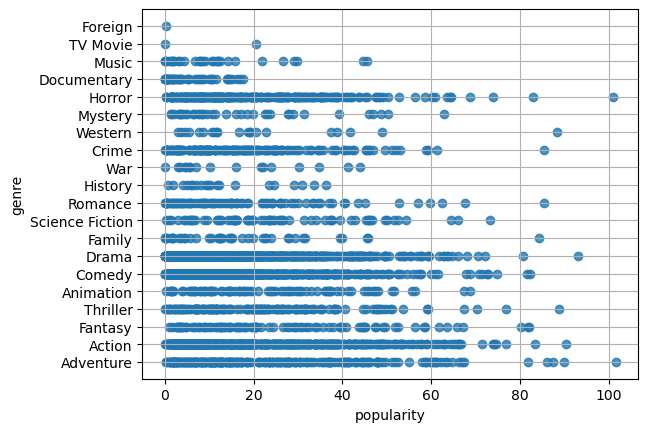

In [56]:
sns.regplot(x = df2["popularity"], y = df2["genre"], fit_reg = False)

plt.grid()